# Best movies by women directors 
## Zeynep Yalcin 
### CS 234 Problem Set 2- Task 3
#### Collaborated with Chiara

Task 1: Using the packages requests and BeautifulSoup to extract the list of 100 movies from the BBC web page.

In [1]:
# URL1 contains the list of best movies (exactly 100)
url= "https://www.bbc.com/culture/article/20191125-the-100-greatest-films-directed-by-women-poll"

In [2]:
import requests
import bs4
from bs4.element import NavigableString
import pandas as pd
from matplotlib import pyplot as plt # shorten the name to type it more easily
from bs4 import BeautifulSoup as BS # shorten the name to type it more easily

A function to retrieve the content of a URL

In [3]:
def getHTMLPage(url):
    """Given a url, get the HTML page content"""
    
    response = requests.get(url)
    if response.status_code == 200: #if code is 200 the webpage has been sucesfully loaded
        return response.text
    else:
        print("Error: {}. Failure resaon: {}".format(response.status_code, 
                                                     response.reason))
        return

Test to make sure this function works to retrieve information from the page, such as the title:

In [4]:
htmlPage = getHTMLPage(url)
domTree = BS(htmlPage, 'html.parser')
domTree.title

<title data-rh="true">The 100 greatest films directed by women - BBC Culture</title>

By inspecting the source HTML of the page, I noticed that the names are nested in < p> elements, so I knew it was contained in of the <p> breaks.

In [5]:
items = domTree.select("p")
len(items)

16

In [6]:
directorslist = items[9]
print(directorslist)

<p>100. The Kids are All Right (Lisa Cholodenko, 2010)<br/>99.    The Souvenir (Joanna Hogg, 2019)<br/>98.    Somewhere (Sofia Coppola, 2010)<br/>97.    Adoption (Márta Mészáros, 1975)<br/>96.    The Meetings of Anna (Chantal Akerman, 1977)<br/>95.    Ritual in Transfigured Time (Maya Deren, 1946)<br/>94.    News From Home (Chantal Akerman, 1977)<br/>93.    Red Road (Andrea Arnold, 2006)<br/>92.    Raw (Julia Ducournau, 2016)<br/>91.    White Material (Claire Denis, 2009)<br/>90.    Fast Times at Ridgemont High (Amy Heckerling, 1982)<br/>89.    The Beaches of Agnes (Agnès Varda, 2008)<br/>88.    The Silences of the Palace (Moufida Tlatli, 1994)<br/>87.    35 Shots of Rum (Claire Denis, 2008)<br/>86.    Wadjda (Haifaa Al-Mansour, 2012)<br/>85.    One Sings, The Other Doesn’t (Agnès Varda, 1977)<br/>84.    Portrait of Jason (Shirley Clarke, 1967)<br/>83.    Sleepless in Seattle (Nora Ephron, 1993)<br/>82.    At Land (Maya Deren, 1944)<br/>81.    A Girl Walks Home Alone at Night (Ana Lily

Now that I have the paragprah that contains the rankings, now I need to extract the text from it.
Before doing that I just made sure that the list is correct by printing it.

In [7]:
page= requests.get(url)
soup= BS(page.text, 'html.parser') 
allP = soup.find_all('p')
p9 = allP[9]

In [8]:
def listToString(s):
    strl= " "
    return (strl.join(s))

In [9]:
from bs4 import *
replace = ('(),')
entries = []
for c in p9.children:
    if type(c) == NavigableString:
        sp = c.split()
        dct = {}
        dct['rank'] = int(sp[0].replace(".", ""))
        for word in sp:
            if '(' in word:
                idx= sp.index(word)
                dct['director']= listToString(sp[idx:len(sp)-1]).replace('(','').replace(',','')
                dct['movie'] = listToString(sp[1:idx])
            dct['year']= sp[len(sp)-1].replace(')',"")
        entries.append(dct)
        
print(entries)

[{'rank': 100, 'year': '2010', 'director': 'Lisa Cholodenko', 'movie': 'The Kids are All Right'}, {'rank': 99, 'year': '2019', 'director': 'Joanna Hogg', 'movie': 'The Souvenir'}, {'rank': 98, 'year': '2010', 'director': 'Sofia Coppola', 'movie': 'Somewhere'}, {'rank': 97, 'year': '1975', 'director': 'Márta Mészáros', 'movie': 'Adoption'}, {'rank': 96, 'year': '1977', 'director': 'Chantal Akerman', 'movie': 'The Meetings of Anna'}, {'rank': 95, 'year': '1946', 'director': 'Maya Deren', 'movie': 'Ritual in Transfigured Time'}, {'rank': 94, 'year': '1977', 'director': 'Chantal Akerman', 'movie': 'News From Home'}, {'rank': 93, 'year': '2006', 'director': 'Andrea Arnold', 'movie': 'Red Road'}, {'rank': 92, 'year': '2016', 'director': 'Julia Ducournau', 'movie': 'Raw'}, {'rank': 91, 'year': '2009', 'director': 'Claire Denis', 'movie': 'White Material'}, {'rank': 90, 'year': '1982', 'director': 'Amy Heckerling', 'movie': 'Fast Times at Ridgemont High'}, {'rank': 89, 'year': '2008', 'directo

This is another method that I tried in order to create a list of dictionaries but I ran into some problems so I ended up using the method seen above!

In [10]:
print(len(directorslist))
for movies in directorslist:
    print(movies)
    #for each break create a new movie 
    #get the children 
    #print(list(movies.children))
    #print(movies)

199
100. The Kids are All Right (Lisa Cholodenko, 2010)
<br/>
99.    The Souvenir (Joanna Hogg, 2019)
<br/>
98.    Somewhere (Sofia Coppola, 2010)
<br/>
97.    Adoption (Márta Mészáros, 1975)
<br/>
96.    The Meetings of Anna (Chantal Akerman, 1977)
<br/>
95.    Ritual in Transfigured Time (Maya Deren, 1946)
<br/>
94.    News From Home (Chantal Akerman, 1977)
<br/>
93.    Red Road (Andrea Arnold, 2006)
<br/>
92.    Raw (Julia Ducournau, 2016)
<br/>
91.    White Material (Claire Denis, 2009)
<br/>
90.    Fast Times at Ridgemont High (Amy Heckerling, 1982)
<br/>
89.    The Beaches of Agnes (Agnès Varda, 2008)
<br/>
88.    The Silences of the Palace (Moufida Tlatli, 1994)
<br/>
87.    35 Shots of Rum (Claire Denis, 2008)
<br/>
86.    Wadjda (Haifaa Al-Mansour, 2012)
<br/>
85.    One Sings, The Other Doesn’t (Agnès Varda, 1977)
<br/>
84.    Portrait of Jason (Shirley Clarke, 1967)
<br/>
83.    Sleepless in Seattle (Nora Ephron, 1993)
<br/>
82.    At Land (Maya Deren, 1944)
<br/>
81.    A G

Since this text contains a lot of punctuation, I wrote a code that would use the punctuation to break it up into the pieces that I need

In [11]:
def getdata(item):
    """Extracting informartion."""
    r, t = item.split(".")
    t, n = t.split('(')
    n, y = n.split(',')
    y, p = y.split(')')
   
    return {"rank": int(r.strip()), "title": t.strip(), "director": n.strip(), "year": int(y.strip())}

Now I am creating a list that contains the dictionaries of each movie, with the information of rank, year, director and name found in this list.

In [12]:
movie_list= []
print(getdata(movies))
for movies in directorslist:
    movie_list.append(getdata(directorslist[movies]))
    

{'rank': 1, 'title': 'The Piano', 'director': 'Jane Campion', 'year': 1993}


KeyError: '100. The Kids are All Right (Lisa Cholodenko, 2010)'

Task 2: Using the results from Task 1 generate a dataframe to store the data. 

In [13]:
movies_df = pd.read_json ('/Users/zeynoyalcin/Desktop/best_movies_list.json')
movies_df

,rank,director,movie,year
0,100,Lisa Cholodenko,The Kids are All Right,2010
1,99,Joanna Hogg,The Souvenir,2019
2,98,Sofia Coppola,Somewhere,2010
3,97,Márta Mészáros,Adoption,1975
4,96,Chantal Akerman,The Meetings of Anna,1977
...,...,...,...,...
95,5,Sofia Coppola,Lost in Translation,2003
96,4,Claire Denis,Beau Travail,1999
97,3,Chantal Akerman,"Jeanne Dielman, 23 Quai du Commerce, 1080 Brux...",1975
98,2,Agnès Varda,Cléo from 5 to 7,1962


Add a new column “decade” to record the decade in which the movie was released. 

In [14]:
movies_df['decade'] = (10 * (movies_df['year'] // 10)) #a decade occurs every 10 years so divide the years
movies_df

,rank,director,movie,year,decade
0,100,Lisa Cholodenko,The Kids are All Right,2010,2010
1,99,Joanna Hogg,The Souvenir,2019,2010
2,98,Sofia Coppola,Somewhere,2010,2010
3,97,Márta Mészáros,Adoption,1975,1970
4,96,Chantal Akerman,The Meetings of Anna,1977,1970
...,...,...,...,...,...
95,5,Sofia Coppola,Lost in Translation,2003,2000
96,4,Claire Denis,Beau Travail,1999,1990
97,3,Chantal Akerman,"Jeanne Dielman, 23 Quai du Commerce, 1080 Brux...",1975,1970
98,2,Agnès Varda,Cléo from 5 to 7,1962,1960


This part is for task 3 where I just want the repeating directors!

In [15]:
women = ['Agnès Varda', 'Kathryn Bigelow', 'Lynne Ramsay', 'Sofia Coppola', 'Claire Denis', 'Céline Sciamma', 'Chantal Akerman', 'Andrea Arnold', 'Lucrecia Martel', 'Jane Campion', 'Mira Nair', 'Leni Riefenstahl', 'Amy Heckerling', 'Penny Marshall', 'Maya Deren', 'Ida Lupino', 'Kira Muratova', 'Kelly Reichardt', 'Debra Granik', 'Ava DuVernay', 'Shirley Clarke']
new_df = movies_df[movies_df.director.isin(women)]
new_df.sort_values('year', inplace=True)
print(new_df)

    rank          director                                              movie  \
55    45  Leni Riefenstahl                                Triumph of the Will   
63    37  Leni Riefenstahl                                            Olympia   
18    82        Maya Deren                                            At Land   
5     95        Maya Deren                        Ritual in Transfigured Time   
50    50        Ida Lupino                                            Outrage   
77    23        Ida Lupino                                    The Hitch-Hiker   
31    69    Shirley Clarke                                     The Connection   
98     2       Agnès Varda                                   Cléo from 5 to 7   
72    28       Agnès Varda                                         Le Bonheur   
16    84    Shirley Clarke                                  Portrait of Jason   
41    59     Kira Muratova                                  The Long Farewell   
97     3   Chantal Akerman  

<ipython-input-15-9841ecc6af5b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.sort_values('year', inplace=True)


I am creating a list of the decades in order so that I can use it in the bar chart as the x-axis

In [16]:
decades_list = movies_df.decade.unique() #finding all the decades that occur
decades_list.sort() #sorting the decades in order
decades_list.tolist() #turning it into a list to use in the bar chart

[1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]

I am also creating a list of the movies that were released in every decade for the y-axis 

In [17]:
num_movies = movies_df.decade.value_counts(ascending=True) #ordering the decades
movie_nums = num_movies.values
movie_nums.tolist() #turning it into list to use in the bar chart

[1, 2, 2, 2, 2, 6, 10, 12, 18, 18, 27]

Then, I created a Matplotlib bar chart to show the total number of movies for each decade.

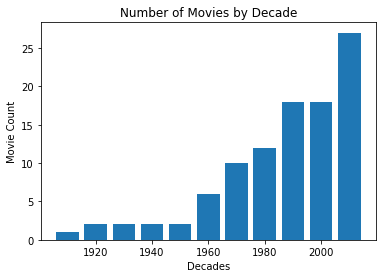

In [18]:
# data
decades = [1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
numMovies = [1, 2, 2, 2, 2, 6, 10, 12, 18, 18, 27]

plt.bar(decades, numMovies, 8)
plt.ylabel("Movie Count")
plt.xlabel("Decades")
plt.title("Number of Movies by Decade")
plt.show()

Task 3: Use Plotly to generate the graph below that shows the span of the career for these women by plotting in a line all their movies in our list. The directors are ordered by their earliest work. 

In [20]:
import plotly.express as px
fig = px.scatter(new_df, x="year",y= "director", color="movie")
fig.show()